In [ ]:
import os
import numpy as np
from pathlib import Path
import pandas as pd
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import _pickle as c
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection

def save(clf,name):
    with open(name,'wb') as fp:
        c.dump(clf,fp)
    print('saved')

def make_dict():
    direc = "D://minor_project details//enron1//"
    files = os.listdir(direc)

    emails = [direc + email for email in files]

    words =  []
    c = len(emails)
    for email in emails:
        f = open(email,encoding="latin-1")
        blob = f.read()
        words += blob.split(" ")

    for i in range(len(words)):
        if not words[i].isalpha():
            words[i] = ""
    dictionary = Counter(words)
    del dictionary[""]
    return dictionary.most_common(3000)

def make_dataset(dictionary):

    direc = "C://Users//240bc//Desktop//Minor//enron1//emails//"
    files = os.listdir(direc)

    emails = [direc + email for email in files]

    labels = []
    feature_set = []
    c = len(emails)
    for email in emails:
        data =  []
        f = open(email,encoding="latin-1")
        words = f.read().split(" ")
        for entry in dictionary:
            data.append(words.count(entry[0]))
        feature_set.append(data)
        if "ham" in email:
            labels.append(0)
        if "spam" in email:
            labels.append(1)
        print(c)
        c = c-1
    return feature_set,labels

d = make_dict()
features,labels = make_dataset(d)
print(len(features))
print(len(labels))

x_train,x_test,y_train,y_test = tts(features,labels,test_size = 0.2)
print("\n\n\n\n\n------- Naive Bayes ---------\n\n ")
clf = MultinomialNB()
clf.fit(x_train,y_train)


preds = clf.predict(x_test)
print(accuracy_score(y_test,preds))

print("\n\n\n\n\n-------SVM ---------\n\n ")
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
print("Confusion Matrix for svm")
print(confusion_matrix(y_test,y_pred))
print("classification Report")
print(classification_report(y_test,y_pred))
print("Accuracy of SVM is")
print(accuracy_score(y_test,y_pred))

print("\n\n\n\n\n------- Executing Random Forest ---------\n\n ")
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)
print(rfc_predict,(y_test,rfc_predict))




print("\n\n\n\n\n------- Executing Confusion Matrix ---------\n\n ")
pred = clf.predict(x_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))


print(clf.predict(x_test))


pred = clf.predict(x_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

save(clf,"text-classifer.mdl")




Automatically created module for IPython interactive environment


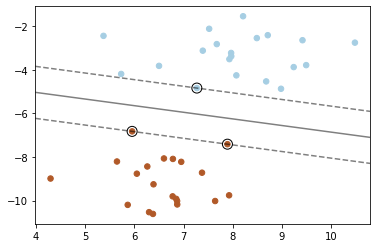

In [11]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
x_train, y_train = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x_train, y_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [12]:
import _pickle as c
import os
from sklearn import *
from collections import Counter

def load(clf_file):
    with open(clf_file,"rb") as fp:
        clf = c.load(fp)
    return clf

def make_dict():
    direc = "C://Users//240bc//Desktop//Minor//enron1//emails//"
    files = os.listdir(direc)

    emails = [direc + email for email in files]

    words =  []
    c = len(emails)
    for email in emails:
        f = open(email,encoding="latin-1")
        blob = f.read()
        words += blob.split(" ")
        print(c)
        c -= 1

    for i in range(len(words)):
        if not words[i].isalpha():
            words[i] = ""
    dictionary = Counter(words)
    del dictionary[""]
    return dictionary.most_common(3000)

clf = load("text-classifer.mdl")
d = make_dict()
while True:
    features = []
    value = input(">").split()
    if value == "exit":
        break
    for word in d:
        features.append(value.count(word[0]))
    res = clf.predict([features])

    print(("Not Spam","Spam")[res[0]])


4192
4191
4190
4189
4188
4187
4186
4185
4184
4183
4182
4181
4180
4179
4178
4177
4176
4175
4174
4173
4172
4171
4170
4169
4168
4167
4166
4165
4164
4163
4162
4161
4160
4159
4158
4157
4156
4155
4154
4153
4152
4151
4150
4149
4148
4147
4146
4145
4144
4143
4142
4141
4140
4139
4138
4137
4136
4135
4134
4133
4132
4131
4130
4129
4128
4127
4126
4125
4124
4123
4122
4121
4120
4119
4118
4117
4116
4115
4114
4113
4112
4111
4110
4109
4108
4107
4106
4105
4104
4103
4102
4101
4100
4099
4098
4097
4096
4095
4094
4093
4092
4091
4090
4089
4088
4087
4086
4085
4084
4083
4082
4081
4080
4079
4078
4077
4076
4075
4074
4073
4072
4071
4070
4069
4068
4067
4066
4065
4064
4063
4062
4061
4060
4059
4058
4057
4056
4055
4054
4053
4052
4051
4050
4049
4048
4047
4046
4045
4044
4043
4042
4041
4040
4039
4038
4037
4036
4035
4034
4033
4032
4031
4030
4029
4028
4027
4026
4025
4024
4023
4022
4021
4020
4019
4018
4017
4016
4015
4014
4013
4012
4011
4010
4009
4008
4007
4006
4005
4004
4003
4002
4001
4000
3999
3998
3997
3996
3995
3994
3993


KeyboardInterrupt: Interrupted by user